In [39]:
import pandas as pd
from sklearn import preprocessing ,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [40]:
data=pd.read_csv("Company_Data.csv")
data.shape

(400, 11)

In [41]:
data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [42]:
data.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [43]:
median=data['Sales'].median()

In [44]:
data['Sales']=['High'if value >median
              else 'low' for value in data['Sales']]

In [45]:
data=pd.get_dummies(data,columns=["Urban","US"],drop_first=True)

In [46]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,High,138,73,11,276,120,3,42,17,1,1
1,High,111,48,16,260,83,1,65,10,1,1
2,High,113,35,10,269,80,2,59,12,1,1
3,low,117,100,4,466,97,2,55,14,1,1
4,low,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,1,33,14,1,1
396,low,139,23,3,37,120,2,55,11,0,1
397,low,162,26,12,368,159,2,40,18,1,1
398,low,100,79,7,284,95,3,50,12,1,1


<Axes: >

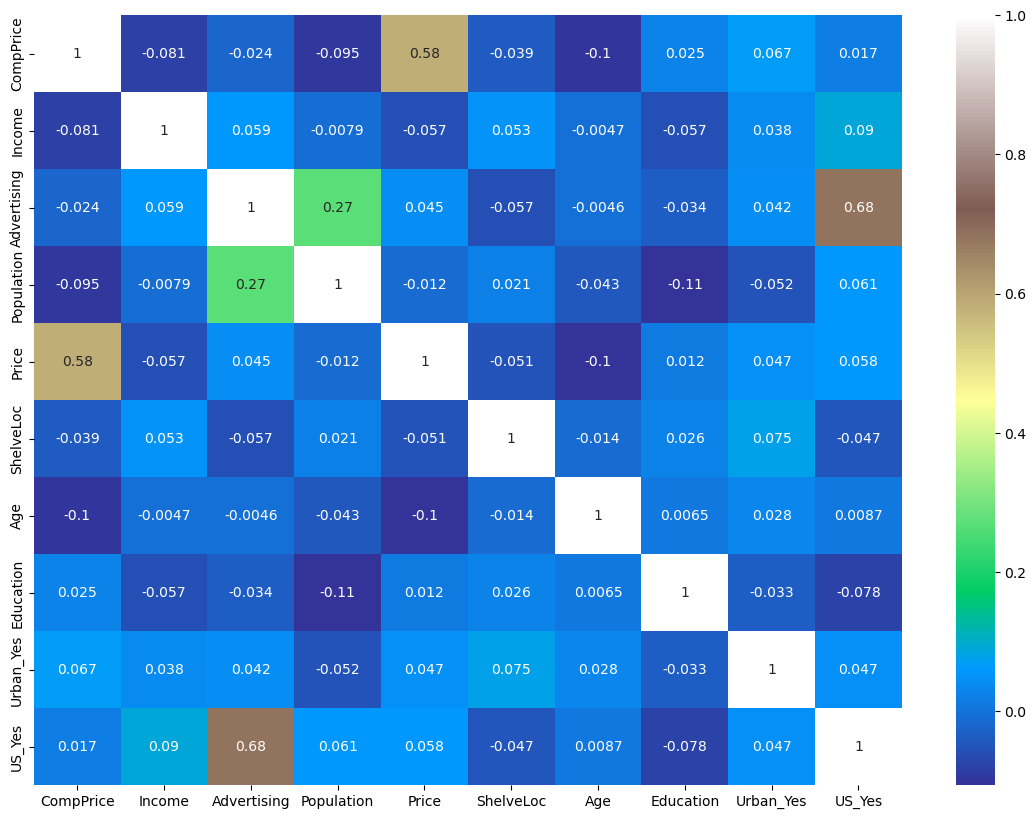

In [47]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='terrain')

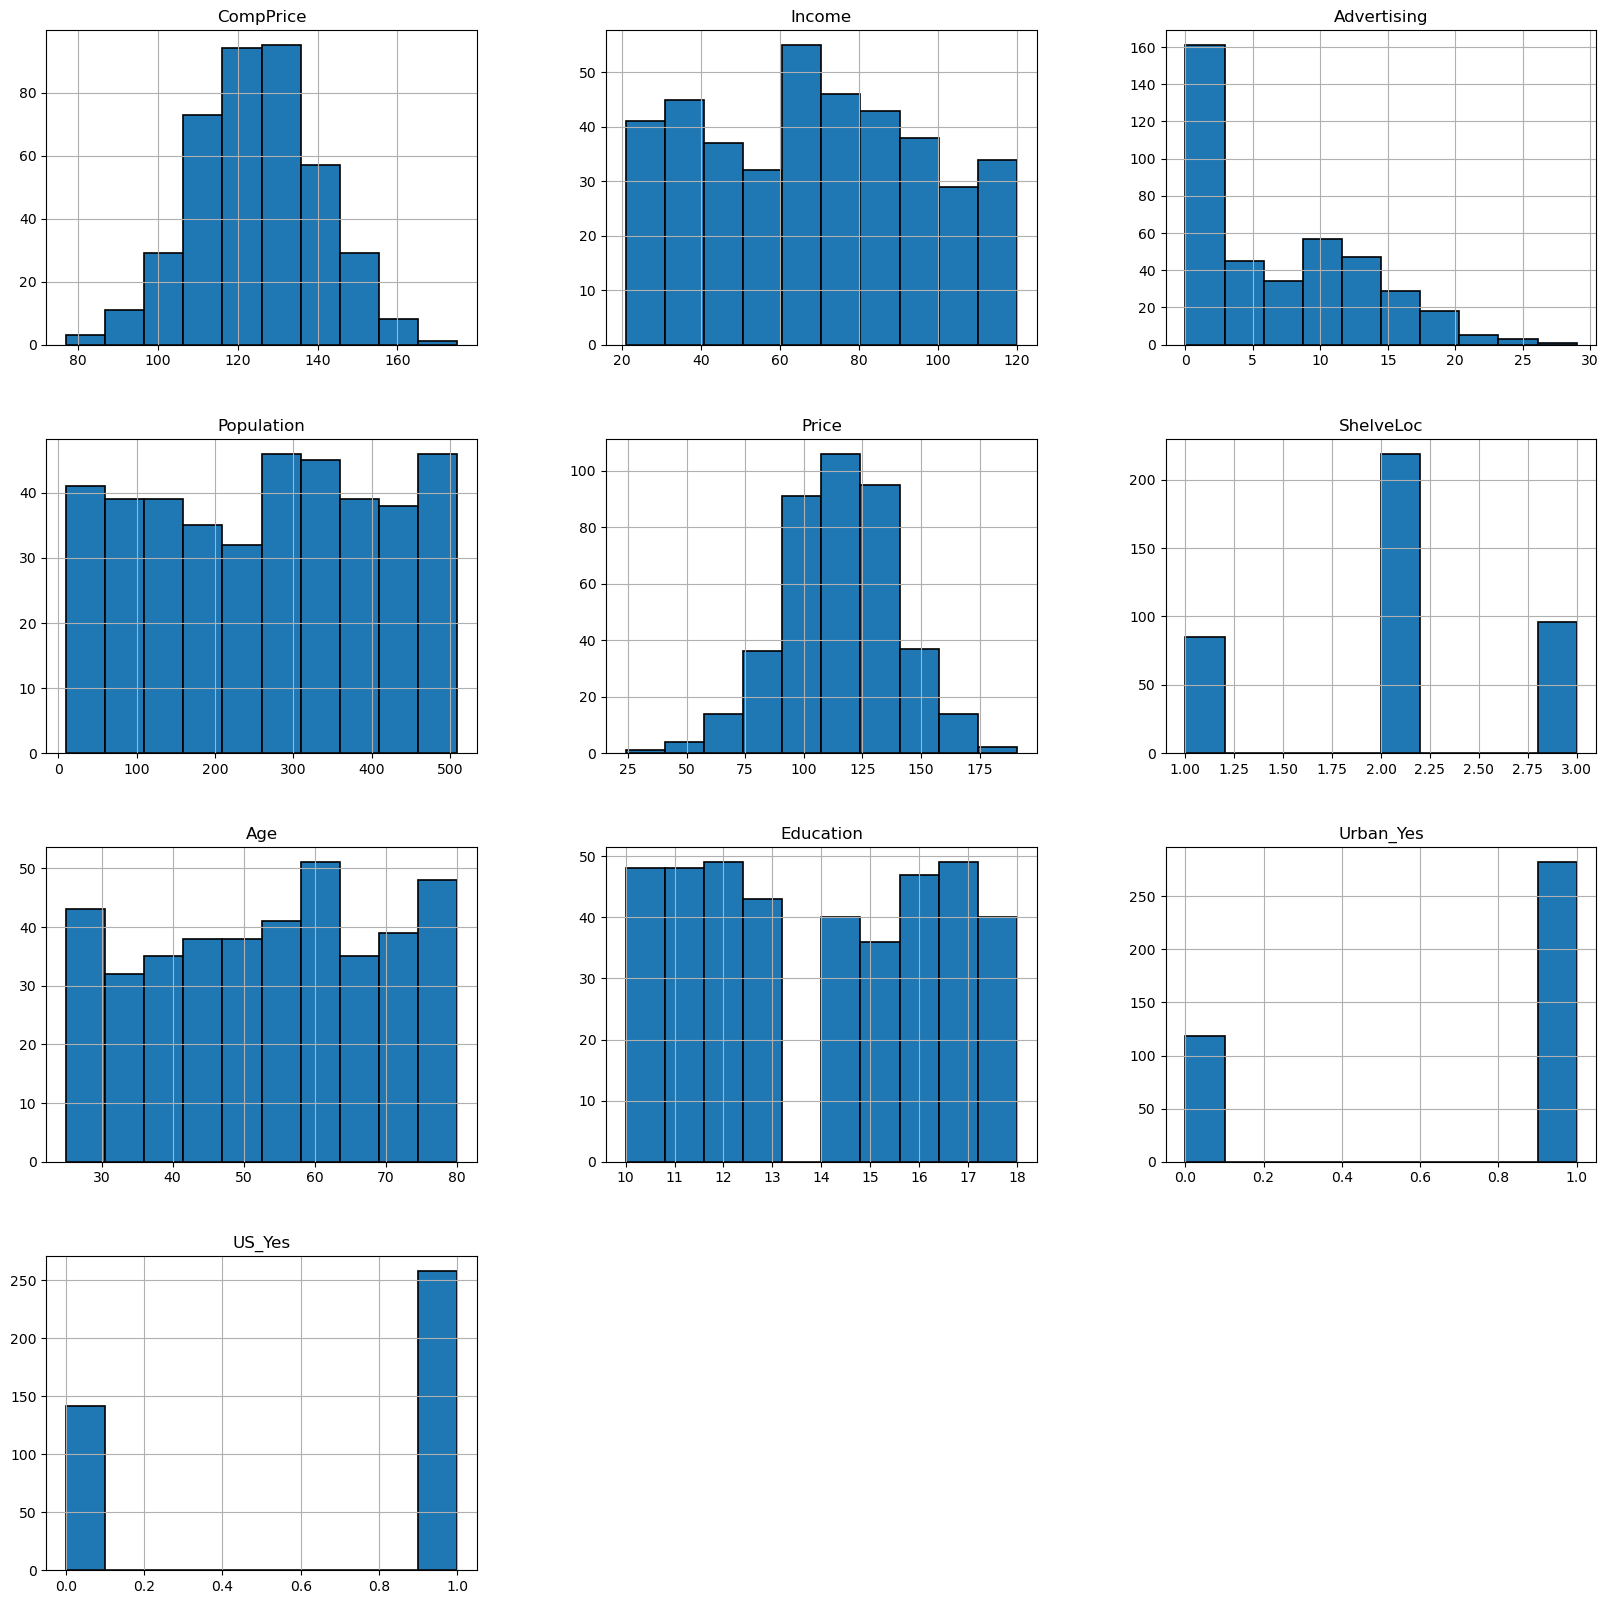

In [48]:
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [49]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [51]:
clf=RandomForestClassifier(random_state=150,ccp_alpha=0.01)

In [52]:
clf=clf.fit(x_train,y_train)

In [53]:
pred=clf.predict(x_test)


In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        High       0.83      0.78      0.80        45
         low       0.74      0.80      0.77        35

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [55]:
pred

array(['High', 'High', 'High', 'low', 'High', 'low', 'low', 'low', 'High',
       'High', 'low', 'low', 'low', 'low', 'High', 'High', 'low', 'low',
       'High', 'low', 'High', 'low', 'High', 'low', 'High', 'low', 'low',
       'low', 'High', 'High', 'High', 'low', 'High', 'High', 'low',
       'High', 'low', 'low', 'low', 'low', 'High', 'low', 'low', 'High',
       'High', 'low', 'High', 'High', 'High', 'low', 'low', 'low', 'High',
       'High', 'High', 'low', 'low', 'High', 'low', 'High', 'low', 'High',
       'High', 'High', 'low', 'High', 'High', 'High', 'low', 'low',
       'High', 'High', 'High', 'High', 'low', 'low', 'High', 'High',
       'High', 'low'], dtype=object)

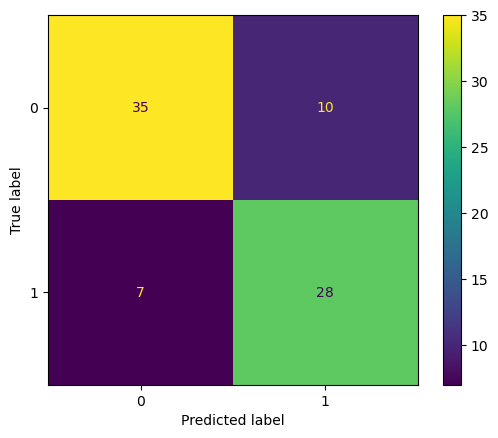

In [56]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,pred))
cm.plot()

# Applying K-Fold cross Validation


In [57]:
kfold=KFold(n_splits=10)
results=cross_val_score(clf,x,y,cv=kfold)
print(results.mean())

0.8174999999999999


# Bagging

In [58]:
model=BaggingClassifier(base_estimator=clf)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.82


# Boosting

In [59]:
model=AdaBoostClassifier(base_estimator=clf)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.835


# 2 Use decision trees to prepare a model on fraud

In [60]:
data=pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [61]:
def x(row):
    if row["Taxable.Income"]<=30000:
        return'0'
    else:
        return'1'
data['Status']=data.apply(x,axis=1)

In [62]:
data.Status.value_counts()

1    476
0    124
Name: Status, dtype: int64

In [63]:
data=pd.get_dummies(data,drop_first=True)
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Status_1
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


<Axes: >

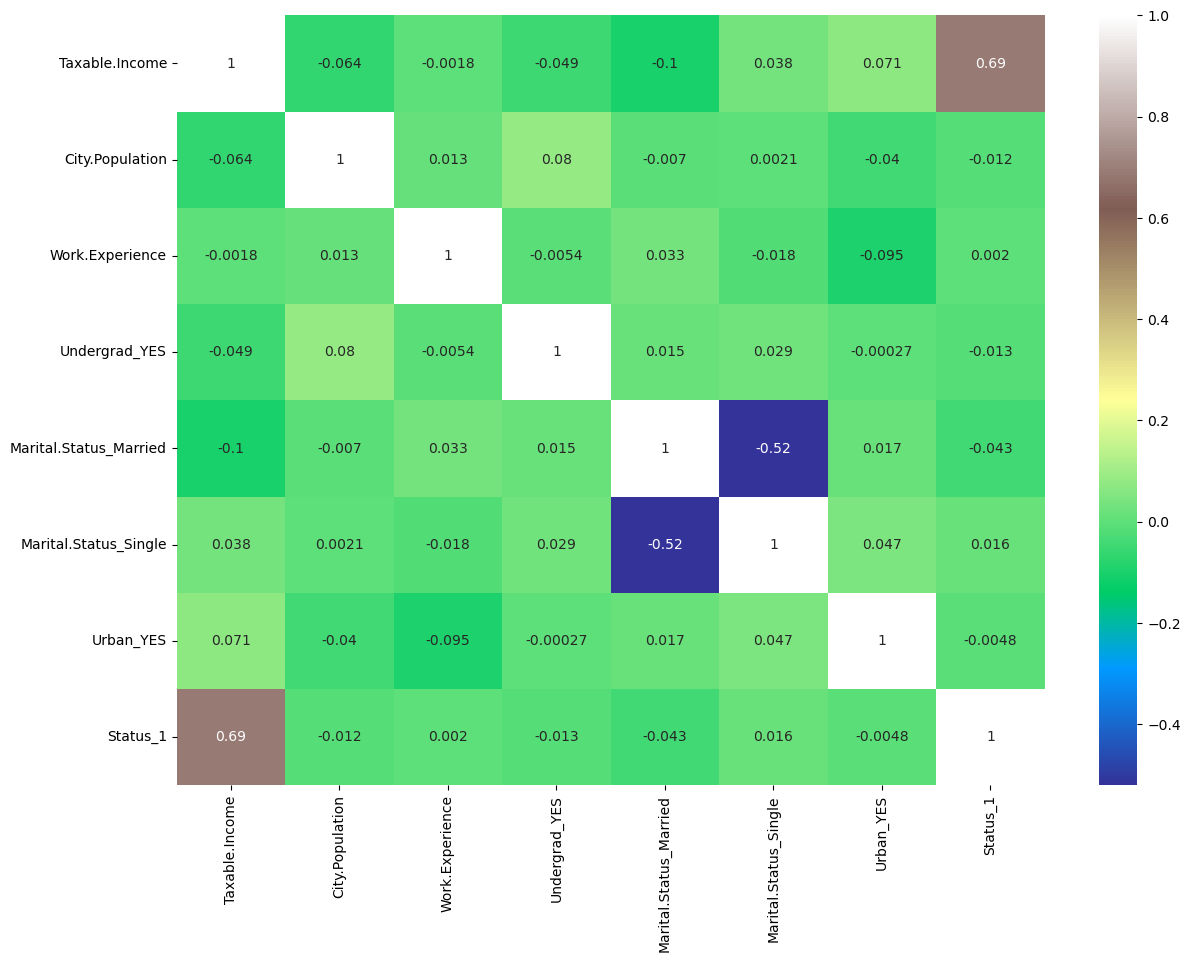

In [64]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='terrain')

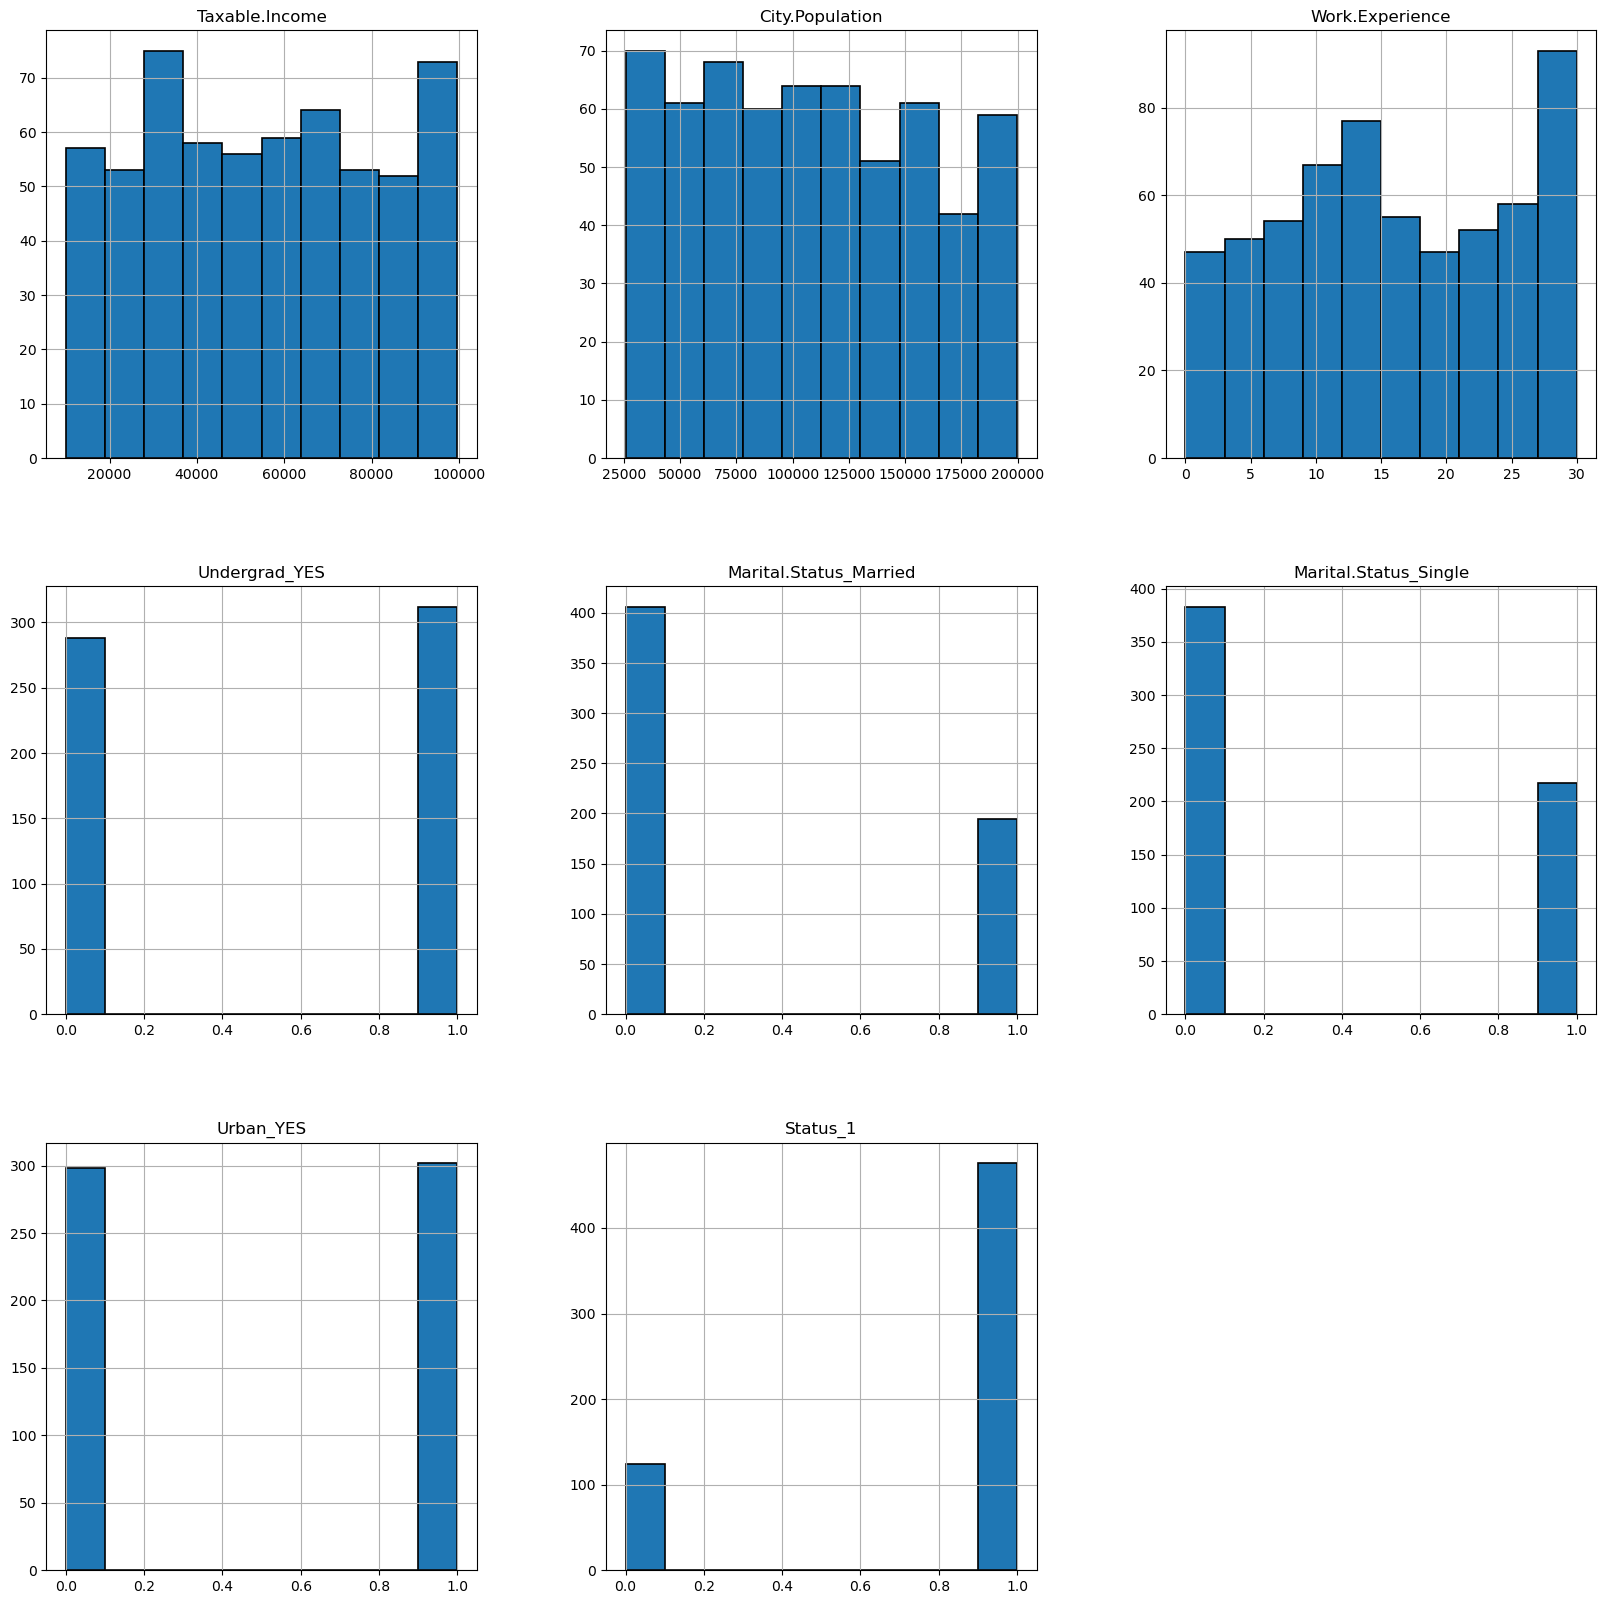

In [65]:
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [66]:
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [67]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [68]:
data=norm_fun(data.iloc[:,:])

In [69]:
data

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Status_1
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [70]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=150)

In [72]:
clf=RandomForestClassifier(random_state=150,ccp_alpha=0.001)

In [73]:
clf_=clf.fit(x_train,y_train)

In [74]:
z=clf_.predict(x_test)


In [75]:
print(classification_report(y_test,z))

              precision    recall  f1-score   support

         0.0       0.22      0.07      0.10        30
         1.0       0.75      0.92      0.83        90

    accuracy                           0.71       120
   macro avg       0.48      0.49      0.46       120
weighted avg       0.62      0.71      0.65       120



In [76]:
z

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

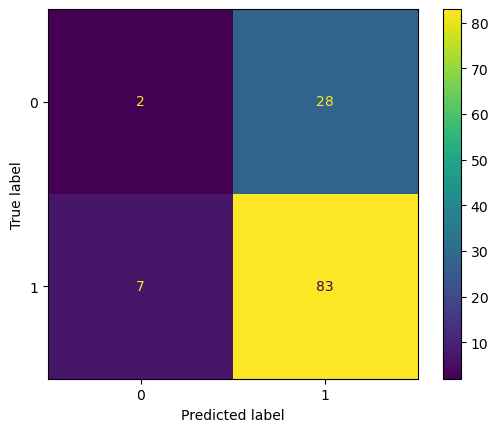

In [77]:
 cm=ConfusionMatrixDisplay(confusion_matrix(y_test,z))
cm.plot()

# Applying K-Fold cross Validation

In [78]:
kfold=KFold(n_splits=10)
results=cross_val_score(clf,x,y,cv=kfold)
print(results.mean())

0.72


# Bagging

In [79]:
model=BaggingClassifier(base_estimator=clf)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7766666666666667


# Boosting

In [80]:
model=AdaBoostClassifier(base_estimator=clf)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7366666666666667
